In [1]:
import imblearn

In [2]:
from sklearn.datasets import make_classification

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [4]:
from collections import Counter

In [5]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


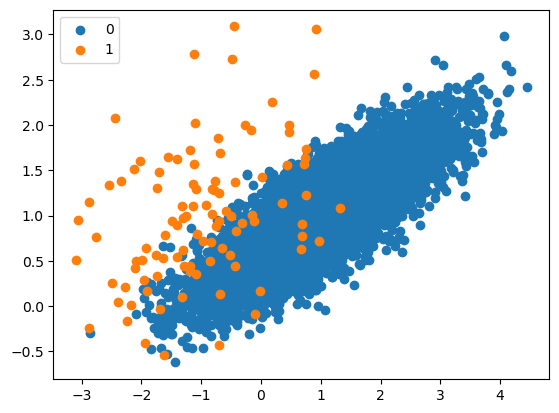

In [6]:
import matplotlib.pyplot as plt
from numpy import where
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# SMOTE 사용하기

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)

In [9]:
counter = Counter(y_new)
print(counter)

Counter({0: 9900, 1: 9900})


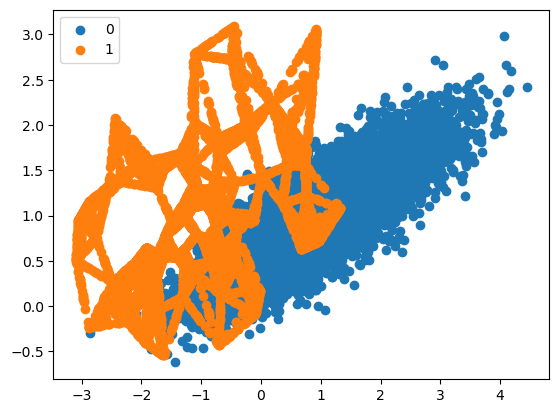

In [10]:
for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    plt.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [11]:
smt1 = SMOTE(sampling_strategy=0.5) #minority class가 majority class의 50%가 되도록
X_new1, y_new1 = smt1.fit_resample(X, y)
counter = Counter(y_new1)
print(counter)

Counter({0: 9900, 1: 4950})


In [12]:
strategy = {0:9900, 1:6600}
smt2 = SMOTE(sampling_strategy=strategy)
X_new2, y_new2 = smt2.fit_resample(X, y)
counter = Counter(y_new2)
print(counter)

Counter({0: 9900, 1: 6600})


# Borderline SMOTE

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

In [14]:
strategy = {0:9900, 1:5500}
bdsmt = BorderlineSMOTE(sampling_strategy=strategy)
X_border, y_border = bdsmt.fit_resample(X, y)

In [15]:
counter = Counter(y_border)
print(counter)

Counter({0: 9900, 1: 5500})


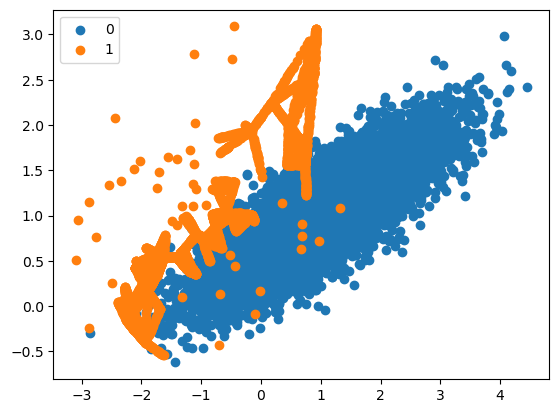

In [16]:
for label, _ in counter.items():
    row_ix = where(y_border == label)[0]
    plt.scatter(X_border[row_ix, 0], X_border[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# SVM SMOTE

In [17]:
from imblearn.over_sampling import SVMSMOTE

In [18]:
strategy = {0:9900, 1:5500}
svm = SVMSMOTE(sampling_strategy=strategy)
X_svm, y_svm = svm.fit_resample(X, y)

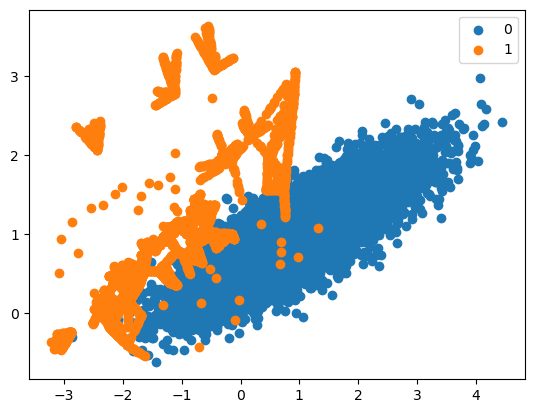

In [19]:
for label, _ in counter.items():
    row_ix = where(y_svm == label)[0]
    plt.scatter(X_svm[row_ix, 0], X_svm[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# ADASYN

In [20]:
from imblearn.over_sampling import ADASYN

In [21]:
strategy = {0:9900, 1:5500}
adasyn = ADASYN(sampling_strategy=strategy)
X_ads, y_ads = adasyn.fit_resample(X, y)

In [22]:
counter = Counter(y_ads)
print(counter)

Counter({0: 9900, 1: 5501})


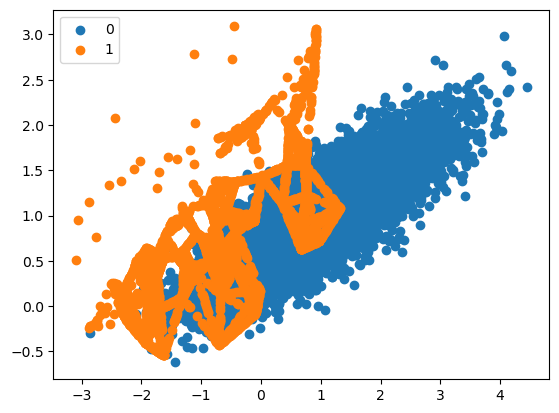

In [23]:
for label, _ in counter.items():
    row_ix = where(y_ads == label)[0]
    plt.scatter(X_ads[row_ix, 0], X_ads[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# K-Means SMOTE

In [24]:
from imblearn.over_sampling import KMeansSMOTE

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=15)

In [26]:
strategy = {0:9900, 1:5500}

ksm = KMeansSMOTE(sampling_strategy=strategy, kmeans_estimator=km)
X_k, y_k = ksm.fit_resample(X, y)

C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
counter = Counter(y_k)
print(counter)

Counter({0: 9900, 1: 5500})


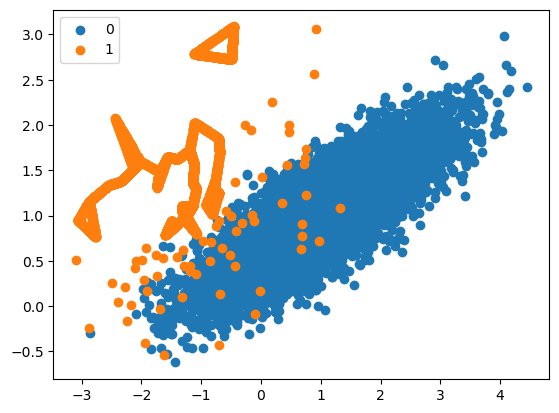

In [28]:
for label, _ in counter.items():
    row_ix = where(y_k == label)[0]
    plt.scatter(X_k[row_ix, 0], X_k[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# Random Undersampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
# strategy = {0:1000, 1:990}
undersample = RandomUnderSampler()

In [31]:
X_under, y_under = undersample.fit_resample(X, y)

In [32]:
counter = Counter(y_under)
print(counter)

Counter({0: 100, 1: 100})


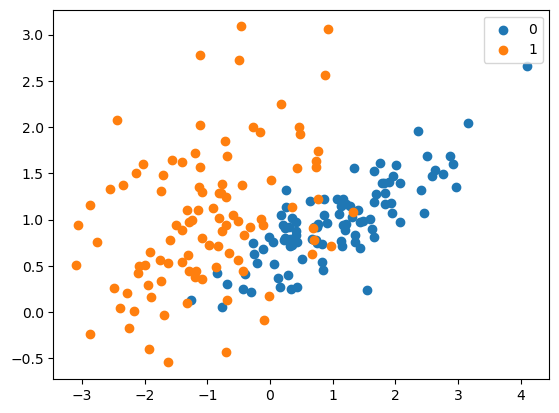

In [33]:
for label, _ in counter.items():
    row_ix = where(y_under == label)[0]
    plt.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [34]:
strategy = {0:200, 1:100}
undersample = RandomUnderSampler(sampling_strategy=strategy)

In [35]:
X_under2, y_under2 = undersample.fit_resample(X, y)

In [36]:
counter = Counter(y_under2)
print(counter)

Counter({0: 200, 1: 100})


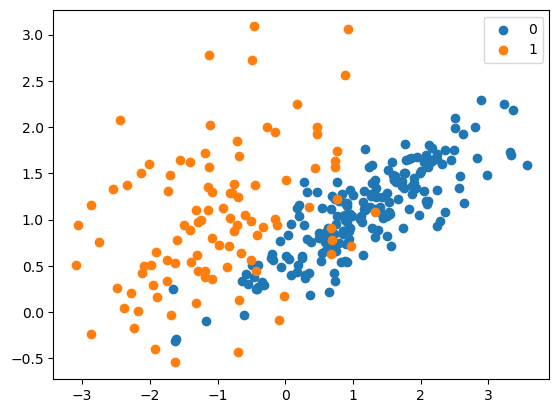

In [37]:
for label, _ in counter.items():
    row_ix = where(y_under2 == label)[0]
    plt.scatter(X_under2[row_ix, 0], X_under2[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# oversampling과 undersampling 같이 사용하기

In [38]:
over_strategy = {0:9900, 1:1000}
smt2 = SMOTE(sampling_strategy=over_strategy) 

In [39]:
X_new1, y_new1 = smt2.fit_resample(X, y)

In [40]:
counter = Counter(y_new1)
print(counter)

Counter({0: 9900, 1: 1000})


In [41]:
under_strategy = {0:2000, 1:1000}
undersample2 = RandomUnderSampler(sampling_strategy=under_strategy)

In [42]:
X_new2, y_new2 = undersample2.fit_resample(X_new1, y_new1)

In [43]:
counter = Counter(y_new2)
print(counter)

Counter({0: 2000, 1: 1000})


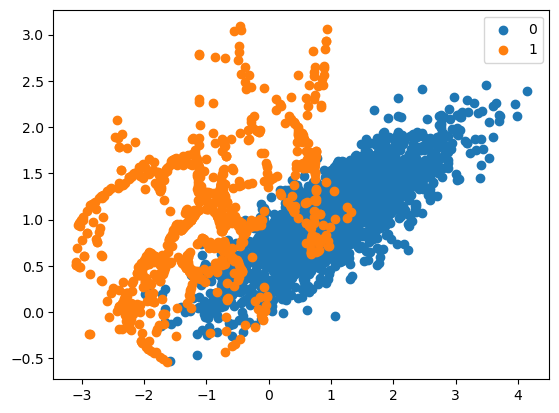

In [44]:
for label, _ in counter.items():
    row_ix = where(y_new2 == label)[0]
    plt.scatter(X_new2[row_ix, 0], X_new2[row_ix, 1], label=str(label))
plt.legend()
plt.show()